<center><h1><font style="color:red;">ASSIGNMENT 4</font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
   Develop a Bayesian classifier any dataset dataset
</h3>

<h3><font style="color:red;">Objectives:- </font> <br>
1. To learn bayes theorem<br>
2. To implement Bayesian classifier
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

### Bayes Theorem

* Bayes Theorem is a method to determine conditional probabilities – that is, the probability of one event occurring given that another event has already occurred. Because a conditional probability includes additional conditions – in other words, more data – it can contribute to more accurate results.
* Bayes' theorem is also known as Bayes' rule, Bayes' law, or Bayesian reasoning, which determines the probability of an event with uncertain knowledge

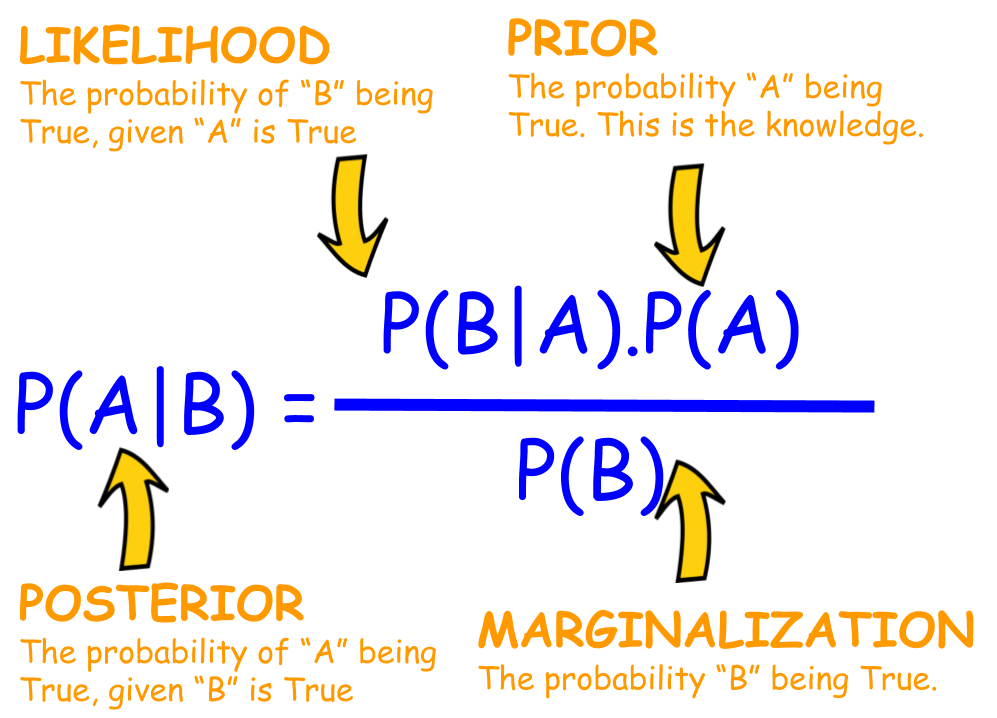

### Types of Naive Bayes algorithm
There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

1. Gaussian Naïve Bayes
2. Multinomial Naïve Bayes
3. Bernoulli Naïve Bayes

### Applications of Naive Bayes algorithm
Naive Bayes is one of the most straightforward and fast classification algorithms. It is very well suited for large volumes of data. It is successfully used in various applications such as :

* Spam filtering
* Text classification
* Sentiment analysis
* Recommender systems
It uses the Bayes theorem of probability for the prediction of unknown classes.

### Bayes Classifier with example
* In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' 
theorem with strong (naïve) independence assumptions between the features. 
* They are among the simplest Bayesian network models But they could be coupled with Kernel density estimation and achieve higher accuracy levels.

### Naive Bayes is a simple technique for constructing classifiers: 
* models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. 
* There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. 
* For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

<b>Problem Statement </b>- Prediction of Heart cancer with the helps of medical attributes and Machine Learning algorith.<br>
<b>Dataset Name </b>- Heart Disease Prediction Dataset.Kaggle<br>
<b>Dataset Information </b>: <br>
The dataset contains 76 features from 303 patients, however, published studies chose only 14 features that are relevant in predicting heart disease. Hence, In this project we will be using the dataset consisting of 303 patients with 14 features set. <br>
<b>Features Explanations:</b>
* 1) age (Age in years) 
* 2) sex : (1 = male, 0 = female) 
* 3) cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina] 
* 4) trestbps (Resting Blood Pressure in mm/hg ) 
* 5) chol (Serum Cholesterol in mg/dl) 
* 6) fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes] 
* 7) restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality] 
* 8) thalach (maximum heart rate achieved) 
* 9) exang (Exercise Induced Angina): [1 = yes, 0 = no] 
* 10) oldpeak (ST depression induced by exercise relative to rest) 
* 11) slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping] 
* 12) ca [number of major vessels (0–3) 
* 13) thal : [1 = normal, 2 = fixed defect, 3 = reversible defect] 
* 14) target: [0 = disease, 1 = no disease] ---> In The dataset we have 303 rows with 14 variables 

    <b>variables types:</b> 
* 1) Binary: sex, fbs, exang, target 
* 2) Categorical: cp, restecg, slope, ca, thal 
* 3) Continuous: age, trestbps, chol, thalac, oldpea

    

### Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score,roc_auc_score
from sklearn import metrics

In [ ]:
from scipy import stats

In [ ]:
from sklearn.naive_bayes import GaussianNB

### Read Dataset

In [ ]:
df =pd.read_csv('heart.csv')

### View Top 5 Rows

In [ ]:
df.head()

### View Last 5 rows

In [ ]:
df.head()

### Dimensions of the Dataset

In [ ]:
df.shape

#### This dataset contains 303 rows and 14 columns

### Columns in dataset

In [ ]:
df.columns

### Concise Summary

In [ ]:
df.info()

#### From above observation we can say that no null values in the dataset ,but lets varify by using pandas functions


### Check Missing values

In [ ]:
df.isnull().sum()

### Check Duplicate Value

In [ ]:
df[df.duplicated()]

#### One duplicate row ,Just Drop That duplicate row

In [ ]:
df.drop(df[df.duplicated()].index,axis=0,inplace=True)

In [ ]:
df.shape

### View Relationship between Data point in dataset

In [ ]:
sns.pairplot(data= df)

#### From above figure we can say that most of datapoints are  not linearly co- related with each other

###  Statistical Summary of data

In [ ]:
df.describe()

### Finding the correlation between variables

In [ ]:
pearsonCorr = df.corr(method='pearson')
spearmanCorr = df.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

#### Cp is highly correlated with target <br> oldpeak and slope are less related with target feature

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

#### Cp is highly correlated with target <br> oldpeak and slope are less related with target feature

### Check the outliers from the dataset

In [ ]:
for i in df.columns[1:-1]:
    Q1,Q3 = np.quantile(df[i],[0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    if lower_bound < 0:  # as in whole dataset there is no -ve value hence we set lowerbound to 0
        lower_bound=0
    upper_bound = Q3 + (1.5*IQR)
    print(i)
    print('Lower Bound =',np.round(lower_bound,2),' Upper Bound =',np.round(upper_bound,2))
    print('min value =',df[i].min(), ' max value =', df[i].max())

    if df[i].min() < lower_bound:
        print('negative Outliers',len(df[(df[i]<lower_bound)]))
    
    if df[i].max() > upper_bound:
        print('positive Outliers', len(df[(df[i]>upper_bound)]))  
        
   
        
       
    
    print('='*50)

#### From above result we can say that fbs feature  contains higher positive outlier 

### Drop the outlier using Z score

In [ ]:
z = np.abs(stats.zscore(df))
df = df[(z<3).all(axis=1)]
df.shape

#### after Droping outlier we are left with 287 rows and 14 columns

In [ ]:
df.target.unique()

### Value count of target variable

In [ ]:
df.target.value_counts()

### Plot the value count

In [ ]:
sns.countplot('target',data=df,label ="Target")

### Model Building

In [ ]:
X =df.drop(['target'], axis =1)
Y = df['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
GNB = GaussianNB()

In [ ]:
GNB.fit(X_train,y_train)

In [ ]:
GNB.score(X_train,y_train)

#### Training Accuracy is 87%

In [ ]:
GNB.score(X_test,y_test)

#### Testing Accuracy is 82%

### Predict on X_train

In [ ]:
y_pred_train = GNB.predict(X_train)
Accuracy_train=metrics.accuracy_score(y_train,y_pred_train )
precision_train=metrics.precision_score(y_train,y_pred_train)
recall_train=metrics.recall_score(y_train,y_pred_train)
f1_score_train=metrics.f1_score(y_train,y_pred_train)
roc_auc_train=metrics.roc_auc_score(y_train,y_pred_train)

In [ ]:
print("Model Name = GaussianNB")
print("Accuracy is =",Accuracy_train)
print("Precision score is =",precision_train)
print("Recall score = ",recall_train)
print("f1 SCore score is = ",f1_score_train)
print("Roc_Auc score is= ",roc_auc_train)

### Predict on X_test

In [ ]:
y_pred_test = GNB.predict(X_test)
Accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
precision_test=metrics.precision_score(y_test,y_pred_test)
recall_test=metrics.recall_score(y_test,y_pred_test)
f1_score_test=metrics.f1_score(y_test,y_pred_test)
roc_auc_test=metrics.roc_auc_score(y_test,y_pred_test)

In [ ]:
print("Model Name = GaussianNB")
print("Accuracy is ",Accuracy_test)
print("Precision score is ",precision_test)
print("Recall _score is",recall_test)
print("f1 SCore score is ",f1_score_test)
print("Roc_Auc score is",roc_auc_test)

### Confusion Matrix

In [ ]:
label=['No','Yes']

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
row_sum = cm.sum(axis=0)
cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
col_sum = cm.sum(axis=1)
cm = np.append(cm,col_sum.reshape(-1,1),axis=1)
labels = label+['Total']
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
yticklabels=labels,linewidths=3,cbar=None,)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()


### Classification Report

In [ ]:
print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
cr = classification_report(y_test,y_pred)
print(cr)


### Conclusion

### Thus we have successfully completed the implementation of Naïve Bayes Gaussian Classifier